In [1]:
#Imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mplsoccer.pitch import Pitch
import seaborn as sns

In [2]:

df = pd.read_csv(r'C:\Users\Feele\Documents\Data\Sunderland\actionfilter.csv')

In [3]:
df.head()

,Unnamed: 0,id,minute,second,teamId,x,y,endX,endY,period/value,...,qualifiers/3/type/displayName,qualifiers/4/type/displayName,qualifiers/5/type/displayName,qualifiers/6/type/displayName,qualifiers/7/type/displayName,qualifiers/8/type/displayName,qualifiers/9/type/displayName,qualifiers/10/type/displayName,qualifiers/11/type/displayName,qualifiers/12/type/displayName
0,12,2321270813,0,52.0,16,28.3,32.9,NaN,NaN,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,14,2321270881,0,52.0,16,26.0,27.6,37.5,53.0,1,...,HeadPass,Angle,Zone,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,52,2321275277,3,12.0,16,34.7,17.4,NaN,NaN,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,53,2321275371,3,13.0,16,34.7,17.4,39.1,32.7,1,...,PassEndY,Zone,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,63,2321276843,3,55.0,16,28.4,30.1,NaN,NaN,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
df = df.drop(df[(df['type/displayName'] == 'Foul') & (df['outcomeType/displayName'] == 'Successful')].index)

In [4]:
# Use Value_Counts to see what Data we have
df['type/displayName'].value_counts(dropna = False)

Pass               52
Aerial              6
BallRecovery        5
Foul                2
OffsideProvoked     1
BallTouch           1
Goal                1
SavedShot           1
TakeOn              1
Tackle              1
Name: type/displayName, dtype: int64

In [5]:
#Triangle            = ^
#Reverse Triangle    = v
#Circle              = o
#Small circle        = .
#Pentagon            = p
#Square              = s
#Left side triangle  = <
#Right side triangle = >
#Diamond             = D
#Hexagon             = H
#Reverse hexagon     = h
#Star                = *
#Diamond             = d
#Cross               = x


In [6]:
# Inflating X and Y to pitch size (statsbomb pitches don't match with WhoScored data)

df['x'] = df['x']*1.2
df['endX'] = df['endX']*1.2
df['y'] = df['y']*.8
df['endY'] = df['endY']*.8

In [44]:
df['type/displayName'].value_counts(dropna = False)

Pass               52
Aerial              6
BallRecovery        5
Foul                2
OffsideProvoked     1
BallTouch           1
Goal                1
SavedShot           1
TakeOn              1
Tackle              1
Name: type/displayName, dtype: int64

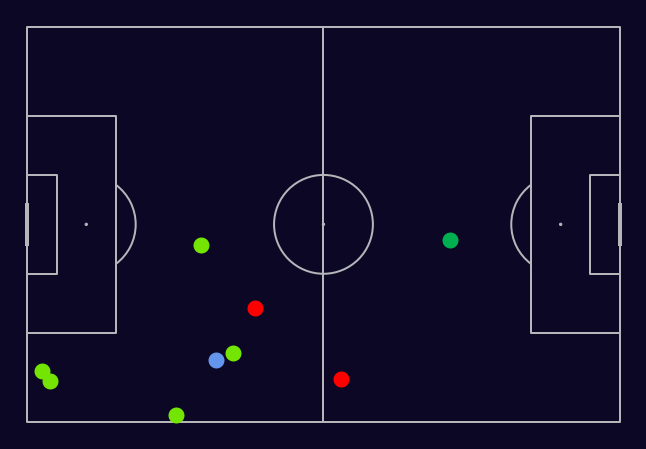

In [9]:
fig ,ax = plt.subplots(figsize=(13.5,8))
fig.set_facecolor('#0B0725')
ax.patch.set_facecolor('#0B0725')

#pitch
pitch = Pitch(pitch_type='statsbomb', orientation='horizontal',
              pitch_color='#0B0725', line_color='#B4B6BA', figsize=(13, 8),
              constrained_layout=False, tight_layout=True)

#Draw the pitch on the ax figure as well as invert the axis
pitch.draw(ax=ax)
plt.gca().invert_yaxis()

#plot

for x in range(len(df['x'])):
    if df['type/displayName'][x] == 'BallRecovery':
        plt.scatter(df['x'][x],
                    df['y'][x],
                    color='#74E502', linewidth=10)
        
for x in range(len(df['x'])):
    if df['type/displayName'][x] == 'Challenge':
        plt.scatter(df['x'][x],
                    df['y'][x],
                    color='#7402E5', linewidth=10)
        
for x in range(len(df['x'])):
    if df['type/displayName'][x] == 'Tackle':
        plt.scatter(df['x'][x],
                    df['y'][x],
                    color='#6495ed', linewidth=10)
        
for x in range(len(df['x'])):
    if df['type/displayName'][x] == 'Foul':
        plt.scatter(df['x'][x],
                    df['y'][x],
                    color='red',marker='o', linewidth=10)    

for x in range(len(df['x'])):
    if df['type/displayName'][x] == 'Goal':
        plt.scatter(df['x'][x],
                    df['y'][x],
                    color='#00B050',marker='o', linewidth=10) 

plt.savefig('action.png',dpi=500,bbox_inches = 'tight')


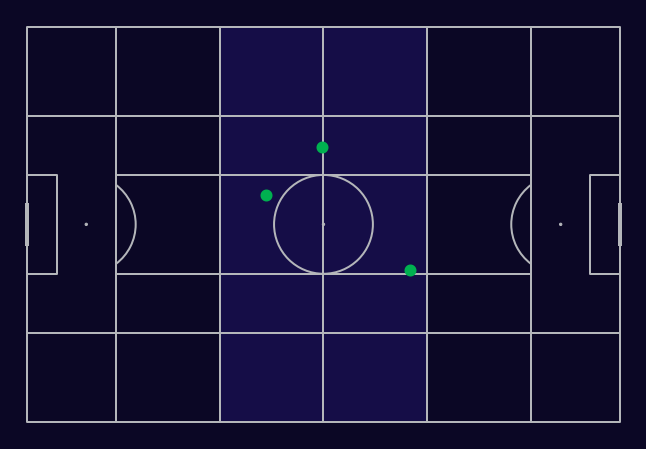

In [18]:
fig,ax = plt.subplots(figsize=(13,8))
fig.set_facecolor('#0B0725')
ax.patch.set_facecolor('#0B0725')

# Setup the pitch
pitch = Pitch(pitch_type='statsbomb', orientation='horizontal', positional=True, 
              shade_middle=True, positional_color='#B4B6BA', shade_color='#150D47',
              pitch_color='#0B0725', line_color='#B4B6BA', figsize=(13, 8),
              constrained_layout=True, tight_layout=False)


pitch.draw(ax=ax)
plt.gca().invert_yaxis()

for x in range(len(df['x'])):
    if df['type/displayName'][x] == 'Foul':
        plt.scatter(df['x'][x],df['y'][x],color='#00B050',marker='o', linewidth=6) 

plt.savefig('test.png',dpi=500,bbox_inches = 'tight') 

In [ ]:
for x in range(len(df['x'])):
    if df['type/displayName'][x] == 'Assist':
        plt.plot((df['x'][x],
                  df['endX'][x]),
                 (df['y'][x],
                  df['endY'][x]),
                 color='gold')
        plt.scatter(df['x'][x],
                    df['y'][x],
                    color='#E99E01',
                   linewidth=10)
        
        plt.scatter(df['endX'][x],
                    df['endY'][x],
                    color='#E99E01',
                   linewidth=2.5,
                   marker ="x

In [ ]:
for x in range(len(df['x'])):
    if df['type/displayName'][x] == 'BallRecovery':
        plt.scatter(df['x'][x],
                    df['y'][x],
                    color='#74E502', linewidth=10)
        
for x in range(len(df['x'])):
    if df['type/displayName'][x] == 'Challenge':
        plt.scatter(df['x'][x],
                    df['y'][x],
                    color='#7402E5', linewidth=10)
        
for x in range(len(df['x'])):
    if df['type/displayName'][x] == 'Tackle':
        plt.scatter(df['x'][x],
                    df['y'][x],
                    color='#6495ed', linewidth=10)
        
for x in range(len(df['x'])):
    if df['type/displayName'][x] == 'Foul':
        plt.scatter(df['x'][x],
                    df['y'][x],
                    color='red',marker='o', linewidth=10)